<a href="https://colab.research.google.com/github/11abdellah11/Computer_Vision_GANs/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import math

In [34]:
torch.manual_seed(111)

In [98]:
train_data_len = 1024
train_data = torch.zeros((train_data_len,2))
train_data[:,0] = 2*math.pi*torch.rand(train_data_len)
train_data[:,1] = torch.sin(train_data[:,0])
train_labels = torch.zeros(train_data_len)
train_set = [(train_data[i],train_labels[i]) for i in range(train_data_len)]

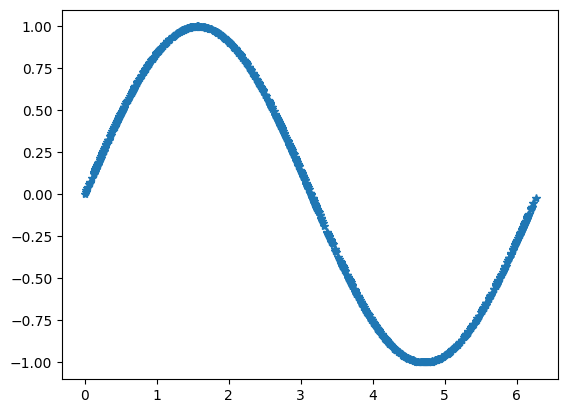

In [99]:
plt.plot(train_data[:,0],train_data[:,1],'*')

In [100]:
train_labels

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [101]:
train_data

tensor([[ 4.6975, -0.9999],
        [ 3.8527, -0.6527],
        [ 3.0568,  0.0847],
        ...,
        [ 5.8924, -0.3809],
        [ 1.9859,  0.9151],
        [ 1.0567,  0.8707]])

In [102]:
# Preparing the dataset for training:

In [103]:
train_set

[(tensor([ 4.6975, -0.9999]), tensor(0.)),
 (tensor([ 3.8527, -0.6527]), tensor(0.)),
 (tensor([3.0568, 0.0847]), tensor(0.)),
 (tensor([1.1293, 0.9041]), tensor(0.)),
 (tensor([ 4.9634, -0.9687]), tensor(0.)),
 (tensor([2.0010, 0.9089]), tensor(0.)),
 (tensor([1.8529, 0.9605]), tensor(0.)),
 (tensor([0.3610, 0.3532]), tensor(0.)),
 (tensor([0.1862, 0.1851]), tensor(0.)),
 (tensor([ 3.8388, -0.6420]), tensor(0.)),
 (tensor([ 4.1743, -0.8587]), tensor(0.)),
 (tensor([1.3498, 0.9757]), tensor(0.)),
 (tensor([2.3954, 0.6789]), tensor(0.)),
 (tensor([0.9958, 0.8392]), tensor(0.)),
 (tensor([1.0624, 0.8735]), tensor(0.)),
 (tensor([ 3.9348, -0.7126]), tensor(0.)),
 (tensor([0.8479, 0.7499]), tensor(0.)),
 (tensor([0.1779, 0.1770]), tensor(0.)),
 (tensor([2.8986, 0.2406]), tensor(0.)),
 (tensor([1.0453, 0.8651]), tensor(0.)),
 (tensor([2.9285, 0.2115]), tensor(0.)),
 (tensor([ 5.0748, -0.9350]), tensor(0.)),
 (tensor([ 4.3197, -0.9239]), tensor(0.)),
 (tensor([1.6914, 0.9927]), tensor(0.)),


Build the discriminator Network

In [104]:
b_size = 32
train_loader = torch.utils.data.DataLoader(train_set,batch_size=b_size)

In [200]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Linear(2,256),
                               nn.ReLU(),
                               nn.Dropout(0.3),
                               nn.Linear(256,128),
                               nn.ReLU(),

                               nn.Dropout(0.3),
                               nn.Linear(128,128),

                               nn.Dropout(0.1),

                               nn.Linear(128,64),
                               nn.ReLU(),
                               nn.Dropout(0.2),
                               nn.Linear(64,1),
                               nn.Sigmoid())
  def forward(self,x):
    output = self.model(x)
    return output


In [201]:
disc = Discriminator()

Generator Net.

In [231]:
class Generator(nn.Module):

  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Linear(2,16),
                               nn.ReLU(),
                               nn.Linear(16,32),
                               nn.ReLU(),
                               nn.Linear(32,2))


  def forward(self,x):
    output = self.model(x)
    return output



In [232]:
gen =  Generator()

In [233]:
lr = 0.001
num_epochs = 300
loss_func = nn.BCELoss()

In [234]:
disc_optimizer = torch.optim.Adam(disc.parameters(),lr = lr)
gen_optimizer = torch.optim.Adam(gen.parameters(),lr = lr)

In [235]:
for epochs in range(1000):

  for n, (real_samples,_) in enumerate(train_loader) :

    # Discriminator training
    real_samples_labels = torch.ones((b_size,1)) # 1: 'true' samples
    latent_spac_samples = torch.randn((b_size,2))
    generated_samples = gen(latent_spac_samples)
    generated_samples_labels = torch.zeros((b_size,1)) # 0:'fake' sample

    all_sampl = torch.cat((real_samples,generated_samples))
    all_labels = torch.cat((real_samples_labels,generated_samples_labels))

    disc.zero_grad()
    output_discri = disc(all_sampl)
    loss_disc_network = loss_func(output_discri,all_labels)
    loss_disc_network.backward()
    disc_optimizer.step()
    #latent_spac_samples = torch.randn((b_size,2))

    # Generator training

    gen.zero_grad()
    generated_samples = gen(latent_spac_samples)
    output_disc_of_the_generated = disc(generated_samples)

    loss_gen = loss_func(output_disc_of_the_generated,real_samples_labels)
    loss_gen.backward()

    gen_optimizer.step()



    if epochs % 10 == 0 and n == b_size-1:
      print(f"epoch {epochs} loss D: {loss_disc_network}")
      print(f"epoch {epochs} loss G: {loss_gen}")




epoch 0 loss D: 0.28636398911476135
epoch 0 loss G: 3.099872589111328
epoch 10 loss D: 0.3692966103553772
epoch 10 loss G: 1.588238000869751
epoch 20 loss D: 0.5064905881881714
epoch 20 loss G: 1.4237918853759766
epoch 30 loss D: 0.6558135747909546
epoch 30 loss G: 0.9313592314720154
epoch 40 loss D: 0.6541582345962524
epoch 40 loss G: 0.8595520257949829
epoch 50 loss D: 0.6126106381416321
epoch 50 loss G: 0.9818116426467896
epoch 60 loss D: 0.6619774103164673
epoch 60 loss G: 0.7937152981758118
epoch 70 loss D: 0.6417182087898254
epoch 70 loss G: 1.0716439485549927
epoch 80 loss D: 0.6523762941360474
epoch 80 loss G: 0.830105185508728
epoch 90 loss D: 0.7241058349609375
epoch 90 loss G: 0.7771106958389282
epoch 100 loss D: 0.5779837965965271
epoch 100 loss G: 1.267283320426941
epoch 110 loss D: 0.6917651295661926
epoch 110 loss G: 0.7912333607673645
epoch 120 loss D: 0.6800627708435059
epoch 120 loss G: 0.693393886089325
epoch 130 loss D: 0.6484552025794983
epoch 130 loss G: 0.9484310

In [236]:
latent_spac_samples = torch.randn(100,2)
generated_samples = gen(latent_spac_samples)

In [237]:
generated_samples=generated_samples.detach()

In [238]:
generated_samples

tensor([[ 0.8856,  0.7763],
        [ 5.8342, -0.2043],
        [ 0.0868,  0.0784],
        [ 5.9018, -0.2386],
        [ 1.6941,  0.9803],
        [ 4.6978, -1.0371],
        [ 2.9791,  0.1578],
        [ 3.0395,  0.0989],
        [ 1.9513,  0.9132],
        [ 4.8395, -1.0139],
        [ 0.2903,  0.2855],
        [ 0.9125,  0.7914],
        [ 1.6920,  0.9812],
        [ 1.6835,  0.9816],
        [ 5.8706, -0.2225],
        [ 0.5566,  0.5296],
        [ 3.6390, -0.4855],
        [ 0.3352,  0.3271],
        [ 1.5757,  0.9909],
        [ 1.9825,  0.9026],
        [ 0.4751,  0.4553],
        [ 0.5114,  0.4862],
        [ 5.2165, -0.8428],
        [ 5.1387, -0.9239],
        [ 2.0171,  0.8859],
        [ 1.8982,  0.9377],
        [ 5.2717, -0.7926],
        [ 2.9983,  0.1376],
        [ 4.9971, -0.9979],
        [ 4.0057, -0.7540],
        [ 5.1590, -0.8826],
        [ 0.6363,  0.5947],
        [ 2.7952,  0.3325],
        [ 5.6778, -0.4565],
        [ 1.3453,  0.9695],
        [ 5.8566, -0

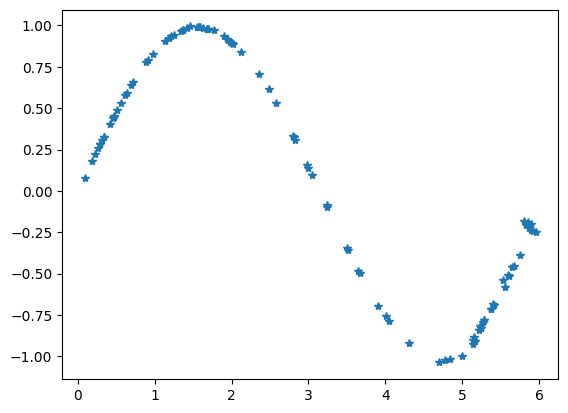

In [239]:
plt.plot(generated_samples[:,0],generated_samples[:,1],'*')